Use cinco puntos equidistantes para encontrar un polinomio interpolante de la función $f(x) = \sinh(x)$ entre $x = -5$ y $x = 5$. Grafique el polinomio. Estime el error cometido para cada $x$, usando la fórmula de error de los polinomios de Legendre. Luego grafique $|f(x) - P(x)|$ y compare con el error estimado.

C:\Users\Miriam Lopez\AppData\Local\Temp\ipykernel_3380\563019722.py:33: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (f_max / np.math.factorial(len(x_nodes) + 1)) * np.abs(productoria(x, x_nodes))


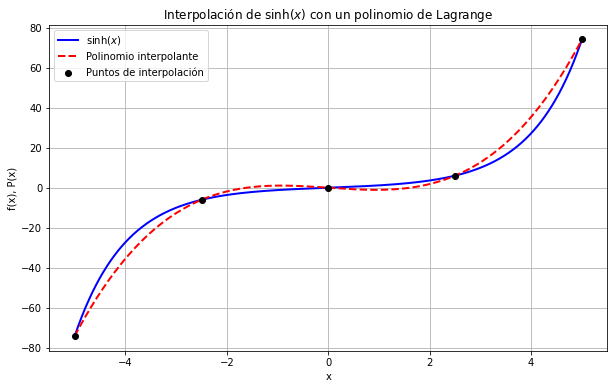

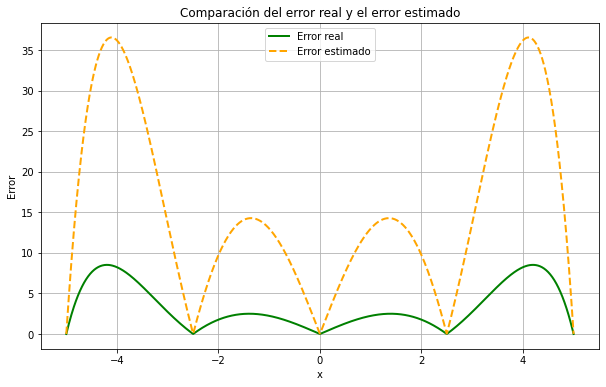

In [32]:

import numpy as np
import matplotlib.pyplot as plt

# Definimos la función sinh(x)
def f(x):
    return np.sinh(x)

# Definimos la función de interpolación de Lagrange
def lagrange(x, puntos):
    '''
    Interpola una función que pasa por n puntos como un polinomio
    de Lagrange y lo evalúa en el punto x. Los puntos deben ser
    dados como una lista de tuplas (xi, f(xi)).
    '''
    Lis = np.ones(len(puntos))
    fs = np.ones(len(puntos))
    for i in range(len(puntos)):
        fs[i] = puntos[i][1]
        for j in range(len(puntos)):
            if j != i:
                Lis[i] *= (x - puntos[j][0]) / (puntos[i][0] - puntos[j][0])
    return sum(fs * Lis)

# Cálculo del producto (x - x_i) para los nodos de interpolación
def productoria(x, x_nodes):
    product = 1
    for xi in x_nodes:
        product *= (x - xi)
    return product

# Cálculo del error estimado utilizando la fórmula del error
def estimated_error(x, x_nodes, f_max):
    return (f_max / np.math.factorial(len(x_nodes) + 1)) * np.abs(productoria(x, x_nodes))

# Se definen los puntos de interpolación
x_values = np.linspace(-5, 5, 5)
y_values = f(x_values)
puntos = list(zip(x_values, y_values))  

# Definimos el rango de x para graficar
x_vals = np.linspace(-5, 5, 1000)

# Calculamos el polinomio interpolante usando la función lagrange
P_x = np.array([lagrange(x, puntos) for x in x_vals])

# Cálculo del error real |f(x) - P(x)|
error_real = np.abs(f(x_vals) - P_x)

# Cálculo de la sexta derivada en el intervalo [-5, 5]
f_max = np.max(np.abs(np.sinh(x_vals)))  

# Calcular el error estimado para cada punto en x_vals
error_estimado = np.array([estimated_error(x, x_values, f_max) for x in x_vals])

# Gráfico de f(x) = sinh(x) y el polinomio interpolante P(x)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f(x_vals), label=r"$\sinh(x)$", color="blue", linewidth=2)
plt.plot(x_vals, P_x, label="Polinomio interpolante", linestyle="--", color="red", linewidth=2)
plt.scatter(x_values, y_values, color="black", zorder=7, label="Puntos de interpolación")
plt.title(r"Interpolación de $\sinh(x)$ con un polinomio de Lagrange")
plt.xlabel("x")
plt.ylabel("f(x), P(x)")
plt.legend()
plt.grid(True)
plt.show()


# Gráfico del error real vs error estimado
plt.figure(figsize=(10, 6))
plt.plot(x_vals, error_real, label="Error real", color="green", linewidth=2)
plt.plot(x_vals, error_estimado, label="Error estimado", linestyle="--", color="orange", linewidth=2)
plt.title("Comparación del error real y el error estimado")
plt.xlabel("x")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.show()

